### Class 7- Starter code


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn import linear_model, metrics
import sklearn
import statsmodels.api as sm

/home/ga/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Create sample data and fit a model

In [2]:
np.random.seed(1020) #Set seed

df = pd.DataFrame({'x': range(100), 'y': range(100)}) #Create a dataframe with two columns
biased_df  = df.copy() #Why?
biased_df.loc[:20, 'x'] = 1 #Make idx 0:19 = 1
biased_df.loc[:20, 'y'] = 1 #Ditto

def append_jitter(series):
    jitter = np.random.random_sample(size=100)
    return(series + jitter)

df['x'] = append_jitter(df.x)
df['y'] = append_jitter(df.y)

biased_df['x'] = append_jitter(biased_df.x)
biased_df['y'] = append_jitter(biased_df.y)

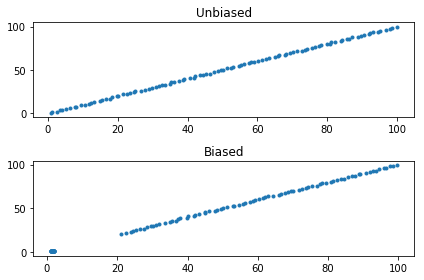

In [3]:
#Plot scatterplots

plt.figure; #Make new figure window

#Plot a 2 x 1 figure, in the top row the Unbiased data
plt.subplot(211); plt.plot(df['x'], df['y'], '.');
plt.title('Unbiased')

#And in the bottom the biased (wrong) data
plt.subplot(212); plt.plot(biased_df['x'], biased_df['y'], '.');
plt.title('Biased')
plt.tight_layout()

In [4]:
## fit
lm = linear_model.LinearRegression()
lm = lm.fit(df[['x']], df['y'])
print('MSE = {}'.format(metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))))
print('r2 = {}'.format(lm.score(df[['x']], df['y'])))

MSE = 0.174793570745
r2 = 0.999790388875


In [5]:
## biased fit
lm = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
print(metrics.mean_squared_error(df['y'], lm.predict(df[['x']])))
print('r2 = {}'.format(lm.score(biased_df[['x']], biased_df['y'])))

0.181782789917
r2 = 0.999831826103


## Cross validation
#### Intro to cross validation with bike share data from last time. We will be modeling casual ridership. 

In [3]:
from sklearn import cross_validation
wd = '../../assets/dataset/'
bikeshare = pd.read_csv(wd + 'bikeshare.csv')
bikeshare.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Create dummy variables and set outcome (dependent) variable

In [5]:
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual

modeldata.head()

,temp,hum,weather_1,weather_2,weather_3
0,0.24,0.81,1,0,0
1,0.22,0.80,1,0,0
2,0.22,0.80,1,0,0
3,0.24,0.75,1,0,0
4,0.24,0.75,1,0,0


In [30]:
pd.crosstab(modeldata['weather_1'], modeldata['weather_2'], modeldata['weather_3'], margins = True, aggfunc = 'count')

weather_2,0,1,All
weather_1,,,
0,1422.0,4544.0,5966.0
1,11413.0,NaN,11413.0
All,12835.0,4544.0,17379.0


#### Create a cross valiation with 5 folds

In [11]:
kf = cross_validation.KFold(len(modeldata), n_folds = 3, shuffle = False) 

for train_index, test_index in kf:

[ 5793  5794  5795 ..., 17376 17377 17378]
[    0     1     2 ..., 17376 17377 17378]
[    0     1     2 ..., 11583 11584 11585]


In [45]:
k_scores = []
k_mse = []

for l, k in enumerate(range(2,50)):
    kf = cross_validation.KFold(len(modeldata), n_folds = k, shuffle = False)
    mse_values = []
    scores = []
    n = 0

    for train_index, test_index in kf:
        lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
        mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
        scores.append(lm.score(modeldata, y))
        n+=1
        
    k_mse.append(np.mean(mse_values))
    k_scores.append(np.mean(scores))
    print('\nMean of {} folds MSE: {}'.format(k, k_mse[l]))
    print('Mean of {} folds r2: {}'.format(k, k_scores[l]))
    
    #Collect Mean cross val for each k
#         k_mse.append(np.mean(mse_values))
#         k_scores.append(np.mean(scores))
    



Mean of 2 folds MSE: 1856.09562181
Mean of 2 folds r2: 0.286661715427

Mean of 3 folds MSE: 1817.58711453
Mean of 3 folds r2: 0.299628415953

Mean of 4 folds MSE: 1742.21496325
Mean of 4 folds r2: 0.307782545047

Mean of 5 folds MSE: 1780.97924083
Mean of 5 folds r2: 0.306643649561

Mean of 6 folds MSE: 1762.15716018
Mean of 6 folds r2: 0.308359734083

Mean of 7 folds MSE: 1736.12757027
Mean of 7 folds r2: 0.309865704907

Mean of 8 folds MSE: 1742.80486598
Mean of 8 folds r2: 0.309920121398

Mean of 9 folds MSE: 1737.87152693
Mean of 9 folds r2: 0.310273750945

Mean of 10 folds MSE: 1743.91733572
Mean of 10 folds r2: 0.31031711203

Mean of 11 folds MSE: 1727.55234543
Mean of 11 folds r2: 0.310827323913

Mean of 12 folds MSE: 1730.10025245
Mean of 12 folds r2: 0.310869328194

Mean of 13 folds MSE: 1720.22017285
Mean of 13 folds r2: 0.311125148782

Mean of 14 folds MSE: 1717.41983777
Mean of 14 folds r2: 0.311236552354

Mean of 15 folds MSE: 1729.15209047
Mean of 15 folds r2: 0.31111402

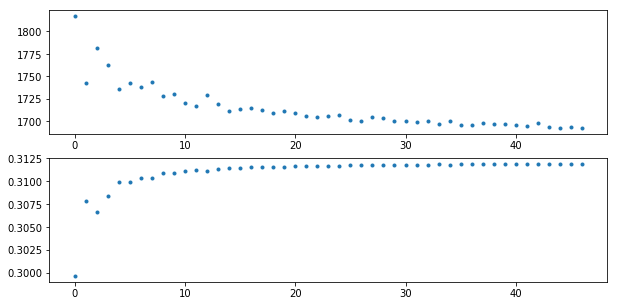

In [47]:
plt.figure(figsize = [10,5])
plt.subplot(211);
plt.plot(k_mse[1:], '.')

plt.subplot(212);
plt.plot(k_scores[1:], '.')

In [13]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print "~~~~ Single Model ~~~~"
print 'MSE of single model:', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'R2: ', lm.score(modeldata, y)

~~~~ Single Model ~~~~
MSE of single model: 1672.58110765
R2:  0.311934605989


### Check
While the cross validated approach here generated more overall error, which of the two approaches would predict new data more accurately: the single model or the cross validated, averaged one? Why?


Answer: 

### There are ways to improve our model with regularization. 
Let's check out the effects on MSE and R2

In [48]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print "~~~ OLS ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'OLS R2:', lm.score(modeldata, y)

lm = linear_model.Lasso().fit(modeldata, y)
print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Lasso R2:', lm.score(modeldata, y)

lm = linear_model.Ridge().fit(modeldata, y)
print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Ridge R2:', lm.score(modeldata, y)

~~~ OLS ~~~
OLS MSE:  1672.58110765
OLS R2: 0.311934605989
~~~ Lasso ~~~
Lasso MSE:  1725.41581608
Lasso R2: 0.290199495922
~~~ Ridge ~~~
Ridge MSE:  1672.60490113
Ridge R2: 0.311924817843


In [50]:
sm.stats.proportions_chisquare()

,temp,hum,weather_1,weather_2,weather_3
temp,1.000000,-0.069881,0.101044,-0.069657,-0.062406
hum,-0.069881,1.000000,-0.383425,0.220758,0.309737
weather_1,0.101044,-0.383425,1.000000,-0.822961,-0.412414
weather_2,-0.069657,0.220758,-0.822961,1.000000,-0.177417
weather_3,-0.062406,0.309737,-0.412414,-0.177417,1.000000


### Figuring out the alphas can be done by "hand"

In [55]:
alphas = np.logspace(-10, 10, 21)
mse = []
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
#     print lm.coef_
    mse.append(metrics.mean_squared_error(y, lm.predict(modeldata)))
    print metrics.mean_squared_error(y, lm.predict(modeldata))

Alpha: 1e-10
1672.58110765
Alpha: 1e-09
1672.58110765
Alpha: 1e-08
1672.58110765
Alpha: 1e-07
1672.58110765
Alpha: 1e-06
1672.58110765
Alpha: 1e-05
1672.58110765
Alpha: 0.0001
1672.58110765
Alpha: 0.001
1672.58110774
Alpha: 0.01
1672.58111645
Alpha: 0.1
1672.58185208
Alpha: 1.0
1672.60490113
Alpha: 10.0
1672.83347262
Alpha: 100.0
1686.31830362
Alpha: 1000.0
1937.81576044
Alpha: 10000.0
2314.83675678
Alpha: 100000.0
2415.77806566
Alpha: 1000000.0
2429.28026459
Alpha: 10000000.0
2430.68891798
Alpha: 100000000.0
2430.83041212
Alpha: 1000000000.0
2430.84456787
Alpha: 10000000000.0
2430.84598351


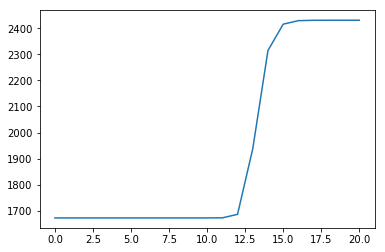

In [56]:
plt.plot(mse)

### Or we can use grid search to make this faster

In [69]:
from sklearn import grid_search

est = [linear_model.Ridge(),linear_model.Lasso()]

for e in est:
    alphas = np.logspace(-10, 10, 21)
    gs = grid_search.GridSearchCV(
    estimator=e,
    param_grid={'alpha': alphas, 'intercept': [True, False]},
    scoring='mean_squared_error')

gs.fit(modeldata, y)

ValueError: Invalid parameter intercept for estimator Lasso. Check the list of available parameters with `estimator.get_params().keys()`.

##### Best score 

In [58]:
print gs.best_score_ 

-1814.09369133


##### mean squared error here comes in negative, so let's make it positive.

In [59]:
print -gs.best_score_ 

1814.09369133


##### explains which grid_search setup worked best

In [60]:
print gs.best_estimator_ 

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


##### shows all the grid pairings and their performances.

In [61]:
print gs.grid_scores_ 

[mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-10}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1.0000000000000001e-09}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-07}, mean: -1817.58711, std: 542.14317, params: {'alpha': 1.0000000000000001e-05}, mean: -1817.58707, std: 542.14331, params: {'alpha': 0.0001}, mean: -1817.58663, std: 542.14477, params: {'alpha': 0.001}, mean: -1817.58230, std: 542.15933, params: {'alpha': 0.01}, mean: -1817.54318, std: 542.30102, params: {'alpha': 0.10000000000000001}, mean: -1817.20111, std: 543.63587, params: {'alpha': 1.0}, mean: -1814.09369, std: 556.35563, params: {'alpha': 10.0}, mean: -1818.51694, std: 653.68607, params: {'alpha': 100.0}, mean: -2125.58777, std: 872.45270, params: {'alpha': 1000.0}, mean: -2458.08836, std: 951.30428, params: {'alpha': 10000.0}, me

## Gradient Descent

In [64]:
num_to_approach, start, steps, optimized = 6.2, 0., [-5, 5], False
while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        i += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach

1.2 is better than 6.2
found better solution! using 1.2
5.0 is closest to 6.2


### Bonus: 
implement a stopping point, similar to what n_iter would do in gradient descent when we've reached "good enough"

## Demo: Application of Gradient Descent 

In [66]:
lm = linear_model.SGDRegressor()
lm.fit(modeldata, y)
print "Gradient Descent R2:", lm.score(modeldata, y)
print "Gradient Descent MSE:", metrics.mean_squared_error(y, lm.predict(modeldata))


Gradient Descent R2: 0.308137882653
Gradient Descent MSE: 1681.81035792


In [68]:
lm = linear_model.LinearRegression()
lm.fit(modeldata, y)
print " R2:", lm.score(modeldata, y)
print "MSE:", metrics.mean_squared_error(y, lm.predict(modeldata))

 R2: 0.311934605989
MSE: 1672.58110765


### Check: Untuned, how well did gradient descent perform compared to OLS?

Answer: 

# Independent Practice: Bike data revisited

There are tons of ways to approach a regression problem. The regularization techniques appended to ordinary least squares optimizes the size of coefficients to best account for error. Gradient Descent also introduces learning rate (how aggressively do we solve the problem), epsilon (at what point do we say the error margin is acceptable), and iterations (when should we stop no matter what?)

For this deliverable, our goals are to:

- implement the gradient descent approach to our bike-share modeling problem,
- show how gradient descent solves and optimizes the solution,
- demonstrate the grid_search module!

While exploring the Gradient Descent regressor object, you'll build a grid search using the stochastic gradient descent estimator for the bike-share data set. Continue with either the model you evaluated last class or the simpler one from today. In particular, be sure to implement the "param_grid" in the grid search to get answers for the following questions:

- With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
- Based on the data, we know when to properly use l1 vs l2 regularization. By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does that statement hold true? If not, did gradient descent have enough iterations?
- How do these results change when you alter the learning rate (eta0)?

**Bonus**: Can you see the advantages and disadvantages of using gradient descent after finishing this exercise?

### Starter Code

In [ ]:
params = {} # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='mean_squared_error',
    )

gs.fit(modeldata, y)

print 'BEST ESTIMATOR'
print -gs.best_score_
print gs.best_estimator_
print 'ALL ESTIMATORS'
print gs.grid_scores_

In [ ]:
## go for it!